## Numbers Dataset

We have a dataset of handwritten digits from 0 to 9

We need some library to read the images, I've chosen the pillow library which comes with Anaconda, if you need to 

pip install Pillow

should install it for you

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
##Printing Examples
def printexamples(X, number_of_classes):
    examples_per_class = 10
    pos = 0
    for cls in range(number_of_classes):
        idxs = range(pos,pos+500)
        idxs = np.random.choice(idxs, examples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
            plt.imshow(X[idx].reshape(20,20).astype('uint8'), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(str(cls))
        pos = pos+500
    plt.show()

### ${\color{lightskyblue} \text{Following the guide in}}$ ${\color{pink} \text{Digits Lab.pdf}}$

------

### ${\color{hotpink} \text{Prepare the data}}$

In [ ]:
# Load images into X
image_filepath = glob.glob('./digits/data/*/*.png')

# Read them in the proper order
image_filepath.sort()

X = np.array([Image.open(image) for image in image_filepath])

X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

##### ${\color{hotpink} \text{Note that the array is 3 dimentional.}}$
##### ${\color{hotpink} \text{This should be 2 dimentional instead as it represents images}}$


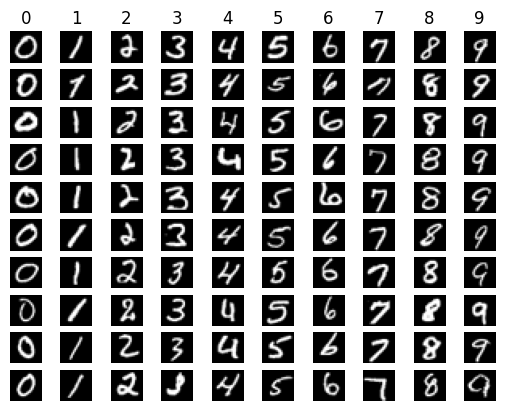

In [5]:
X = X.reshape(5000, 20*20)

X.shape

printexamples(X, 10)

------
##### ${\color{hotpink} \text{get the y values for each X}}$

In [11]:
# image_filepath[1].split("/")[3]
y = np.array([image.split("/")[3] for image in image_filepath])

y

array(['0', '0', '0', ..., '9', '9', '9'], shape=(5000,), dtype='<U1')

------
### ${\color{hotpink} \text{k-Nearest Neighbours}}$

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)